## Data exploration for Sentence Bert Pretraining Data 

In [2]:
import numpy as np
import pandas as pd

import time
import datetime as datetime
import os 

from sentence_transformers import SentenceTransformer, util
import torch

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from tqdm import tqdm

import matplotlib.pyplot as plt

In [3]:
import matplotlib
import sentence_transformers

print('Torch version: ', torch.__version__)
#print('UMAP version: ', umap.__version__)
print('matplotlib: {}'.format(matplotlib.__version__))
print('sentence_transformers: {}'.format(sentence_transformers.__version__))

Torch version:  1.12.1+cu102
matplotlib: 3.6.2
sentence_transformers: 2.2.2


In [5]:
#from sentence_transformers import datasets

In [4]:
from datasets import Dataset,load_dataset,concatenate_datasets,load_from_disk

In [11]:
data_path = '/media/chengyu/Elements1/HuggingFace/Data/Raw_LM_Data/Processed'
dfs = os.listdir(data_path)
dfs = [os.path.join(data_path,p) for p in dfs]
raw_dataset = load_dataset('text', data_files=dfs) ## default split is 'train'
raw_dataset

Resolving data files: 100%|██████████| 330/330 [00:00<00:00, 339911.67it/s]
Using custom data configuration default-de3887bab6e399f7


Extracting data files: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


Dataset text downloaded and prepared to /home/chengyu/.cache/huggingface/datasets/text/default-de3887bab6e399f7/0.0.0/21a506d1b2b34316b1e82d0bd79066905d846e5d7e619823c0dd338d6f1fa6ad. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00, 50.73it/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 4937514
    })
})

#### Take a look at overal paragraph legnth (sample some)

In [12]:
sample_data = raw_dataset.shuffle(seed=42)['train'].select(range(10000))

In [13]:
def get_length(e):
    e['length'] = len(e['text'].split())
    return e

Parameter 'function'=<function get_length at 0x7f89ac1971f0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
100%|██████████| 10000/10000 [00:00<00:00, 10447.45ex/s]


<AxesSubplot: >

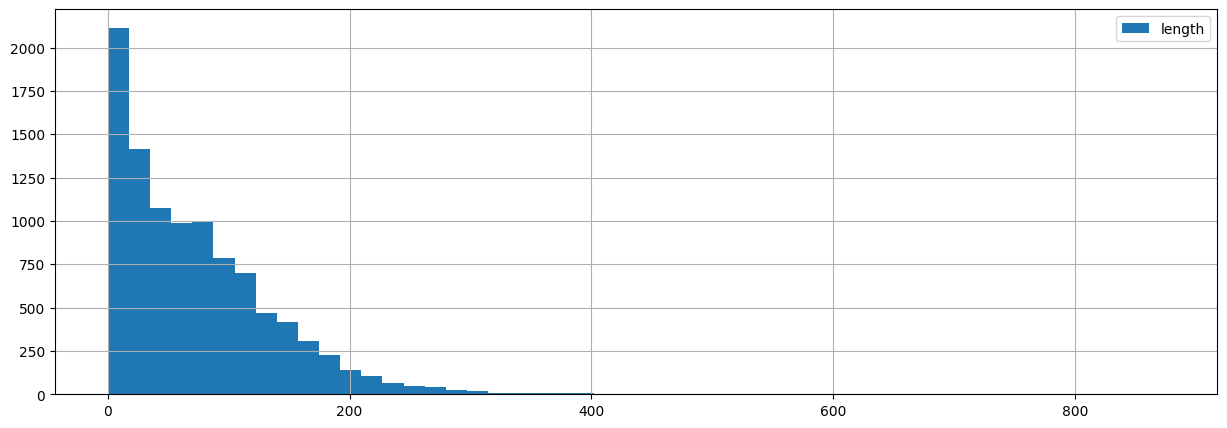

In [14]:
sample_data = sample_data.map(get_length,batch_size=1000)
df = sample_data.to_pandas()['length']
df.hist(bins=50, figsize=(15,5), legend=True)